# Introducción
Este proyecto utiliza el algoritmo Apriori para identificar relaciones y patrones de asociación entre 54 variables binarias en un dataset. El algoritmo Apriori es ampliamente utilizado en el análisis de datos transaccionales para descubrir conjuntos de ítems frecuentes y generar reglas de asociación. En este caso, cada variable binaria representa la presencia o ausencia de un ítem en una transacción, y el objetivo es encontrar combinaciones de ítems que ocurren juntas con una frecuencia significativa.

El uso de Apriori nos permite comprender mejor las interacciones entre estas variables y extraer conocimientos valiosos sobre las asociaciones subyacentes en los datos, facilitando la toma de decisiones informadas y la identificación de patrones relevantes.

1. Se importan las librerías necesarias.
2. Se carga un dataset desde un archivo CSV.
3. Se aplica el algoritmo Apriori para encontrar ítemsets frecuentes en el dataset con un soporte mínimo del 20%.
4. Se generan reglas de asociación basadas en los ítemsets frecuentes utilizando la métrica de "lift" con un umbral mínimo de 1.0.
5. Se imprimen los ítemsets frecuentes y las reglas de asociación resultantes.

In [20]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = 'data.csv'
df = pd.read_csv(file_path)

# Aplicar el algoritmo Apriori
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Mostrar los resultados
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
     support                                           itemsets
0   0.508772                              (análisis de entorno)
1   0.228070                                          (Delphi )
2   0.228070              (Ejes de Schwart o de incertidumbre )
3   0.201754                                     (Entrevistas )
4   0.289474                               (Panel de expertos )
5   0.596491                        (Redacción  de escenarios )
6   0.771930                          (Revisión Bibliografica )
7   0.491228                                           (Taller)
8   0.324561   (Redacción  de escenarios , análisis de entorno)
9   0.438596     (análisis de entorno, Revisión Bibliografica )
10  0.236842                      (análisis de entorno, Taller)
11  0.228070      (Panel de expertos , Revisión Bibliografica )
12  0.456140  (Redacción  de escenarios , Revisión Bibliogra...
13  0.254386                (Redacción  de escenarios , Taller)
14  0.394737         

/home/juan/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Barplot de Ítemsets Frecuentes

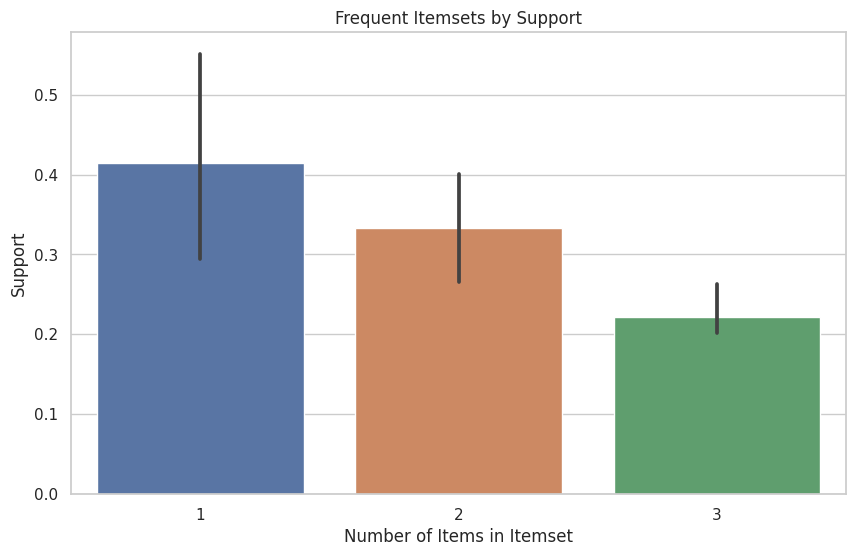

In [21]:
plt.figure(figsize=(10, 6))
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
sns.barplot(x='length', y='support', data=frequent_itemsets)
plt.title('Frequent Itemsets by Support')
plt.xlabel('Number of Items in Itemset')
plt.ylabel('Support')
plt.show()


#### Lectura:
Eje X (Number of Items in Itemset): Representa el número de ítems en cada ítemset frecuente. Por ejemplo, un valor de 1 indica que se trata de ítemsets de un solo ítem, un valor de 2 indica ítemsets de dos ítems, y así sucesivamente.
Eje Y (Support): Representa el soporte de los ítemsets frecuentes, es decir, la proporción de transacciones en las que aparece un ítemset específico.
Barras: Cada barra representa el soporte promedio de los ítemsets que tienen una determinada cantidad de ítems. La altura de la barra indica cuánto soporte tienen esos ítemsets en el dataset.

#### Interpretación:
Esta visualización te ayuda a comprender cuántos ítemsets frecuentes existen para cada tamaño (número de ítems) y cuál es su soporte promedio. Puedes identificar rápidamente si los ítemsets más frecuentes tienden a tener más o menos ítems.

# Scatterplot de Reglas de Asociación

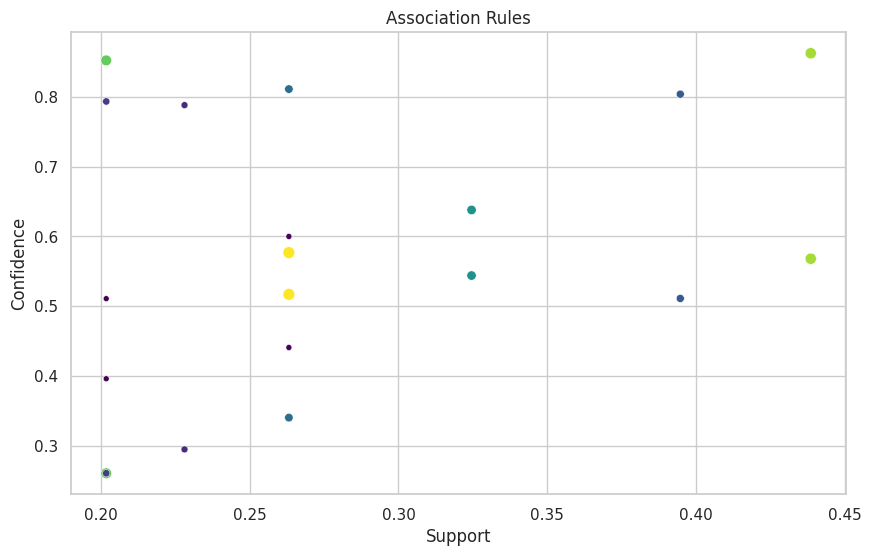

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', legend=False)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


#### Lectura:
Eje X (Support): Representa el soporte de cada regla de asociación, es decir, la proporción de transacciones en las que aparece tanto el antecedente como el consecuente de la regla.
Eje Y (Confidence): Representa la confianza de cada regla de asociación, es decir, la proporción de transacciones con el antecedente en las que también aparece el consecuente.
Tamaño de los Puntos (Lift): Representa el "lift" de la regla, que mide cuán dependientes son los ítems entre sí. Un "lift" mayor que 1 indica una asociación positiva.
Color de los Puntos (Lift): El color también representa el "lift" de la regla, proporcionando una dimensión adicional para identificar las reglas con mayor "lift".

#### Interpretación:
Esta visualización te ayuda a identificar las reglas de asociación más fuertes en términos de soporte y confianza. Las reglas con puntos más grandes y colores más brillantes tienen un mayor "lift", lo que indica asociaciones más interesantes. Puedes observar cómo se distribuyen las reglas en términos de soporte y confianza, y enfocarte en las que tienen valores altos en ambos.

# Heatmap de Reglas de Asociación

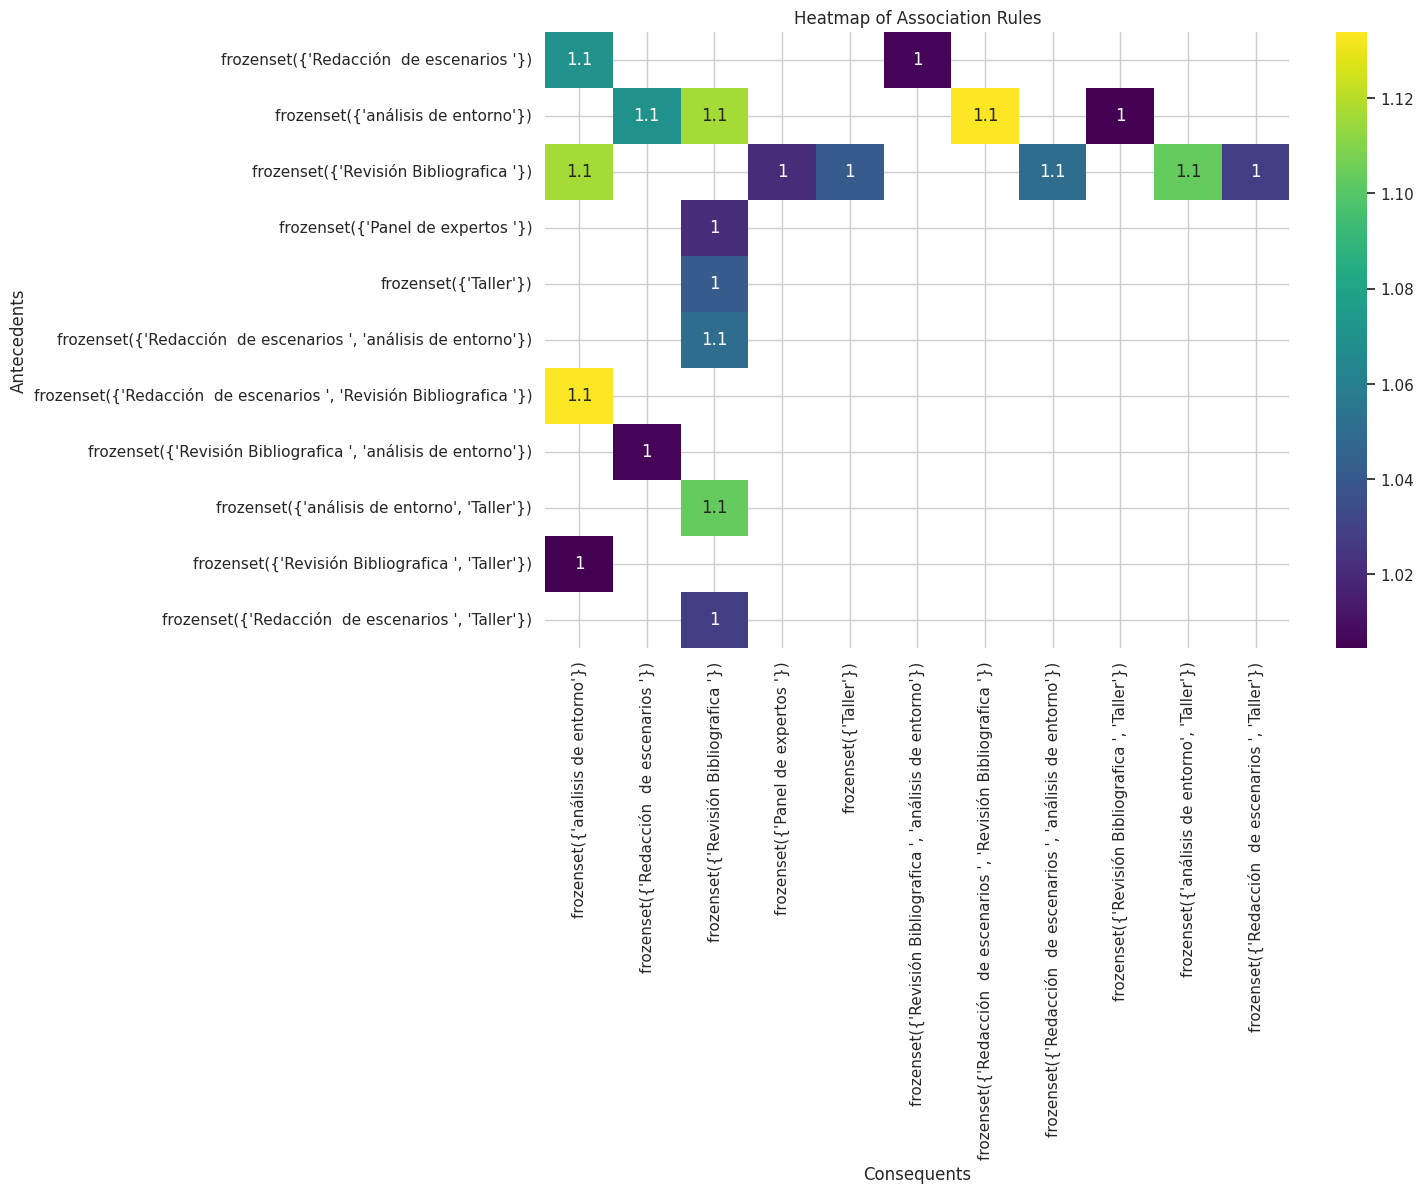

In [23]:
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title('Heatmap of Association Rules')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


#### Lectura:
Eje X (Consequents): Representa los ítems que aparecen como consecuentes en las reglas de asociación.
Eje Y (Antecedents): Representa los ítems que aparecen como antecedentes en las reglas de asociación.
Celdas (Valores de Lift): Cada celda muestra el valor del "lift" de la regla correspondiente al antecedente y consecuente. Un valor de "lift" mayor que 1 indica una asociación positiva.

#### Interpretación:
El heatmap te permite visualizar todas las reglas de asociación en un formato de matriz, donde puedes ver rápidamente cuáles son las asociaciones más fuertes (celdas con colores más brillantes y valores de lift más altos). Esta visualización es útil para identificar patrones específicos entre antecedentes y consecuentes y entender mejor las relaciones entre diferentes ítems en el dataset.